In [1]:
import numpy as np
import pandas as pd

needed_columns = ['year','regsmk','_evape','eversmk','ever_vape','ever_vape2','_grade','stdnt_age']

# import from 2010 on first to use a subset.
df = pd.read_csv('data/NYYTS_2000_2018_PublicUse.csv', \
                       #dtype={'school_id': int }, \
                       #parse_dates=['year'],
                       usecols=needed_columns,\
                       skiprows=[i for i in range(1,50000)])
# filter to find 2010 onward only
df = df[df['year'] >= 2010]
print(df.year.unique())

# meta info
print(df.info())

# swap NaN values for simple zero
df.fillna(0, inplace=True) 

# we merge the columns for ever_vape and ever_vape2
# as they are essentially same and mutually exclusive in surveys 
df['ever_vaped'] = df.ever_vape + df.ever_vape2
df.describe()

[2010 2012 2014 2016 2018]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41829 entries, 26007 to 67835
Data columns (total 8 columns):
year          41829 non-null int64
_grade        41463 non-null float64
_evape        22975 non-null float64
stdnt_age     41584 non-null float64
eversmk       40674 non-null float64
regsmk        40918 non-null float64
ever_vape     8042 non-null float64
ever_vape2    14933 non-null float64
dtypes: float64(7), int64(1)
memory usage: 2.9 MB
None


,year,_grade,_evape,stdnt_age,eversmk,regsmk,ever_vape,ever_vape2,ever_vaped
count,41829.000000,41829.000000,41829.000000,41829.000000,41829.000000,41829.000000,41829.000000,41829.000000,41829.000000
mean,2013.818117,8.743312,0.137751,6.266012,1.769394,1.926917,0.354730,0.606039,0.960769
std,2.869013,2.119928,0.344643,2.171505,0.482345,0.333621,0.744212,0.858399,0.927755
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,7.000000,0.000000,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,2014.000000,9.000000,0.000000,6.000000,2.000000,2.000000,0.000000,0.000000,1.000000
75%,2016.000000,10.000000,0.000000,8.000000,2.000000,2.000000,0.000000,1.000000,2.000000
max,2018.000000,12.000000,1.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 6312 to 98561
Data columns (total 6 columns):
YEAR                  870 non-null int64
LocationAbbr          870 non-null object
MeasureDesc           870 non-null object
ProvisionGroupDesc    870 non-null object
ProvisionDesc         870 non-null object
MeasureId             870 non-null object
dtypes: int64(1), object(5)
memory usage: 47.6+ KB
None
870 6


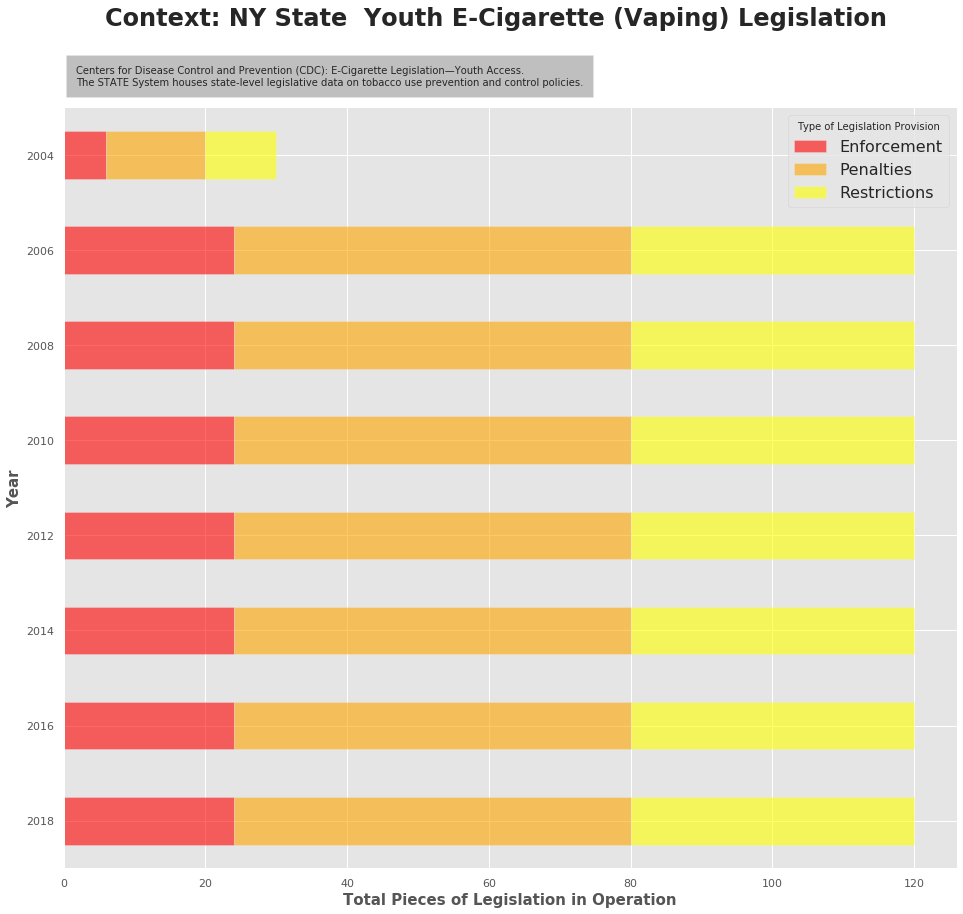

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

needed_columns = ['YEAR', 'LocationAbbr', 
       'MeasureDesc', 'ProvisionGroupDesc', 'ProvisionDesc','MeasureId']

# import from 2010 on first to use a subset.
dfcdc = pd.read_csv('data/CDC-STATE.csv', \
                       usecols=needed_columns)
# filter to find 2012-2018  only
dfcdc = dfcdc[dfcdc['YEAR'] >= 2004]
dfcdc = dfcdc[dfcdc['YEAR'] <= 2018]
dfcdc = dfcdc[dfcdc['YEAR'] % 2 == 0]
dfcdc = dfcdc[dfcdc['LocationAbbr'] == 'NY']

# meta info
print(dfcdc.info())
# swap NaN values for simple zero
dfcdc.fillna(0, inplace=True) 

#rows cols
r, c = dfcdc.shape
print(r, c)

mpl.style.use('ggplot')
fig = plt.figure(figsize=(16,14))
plt.subplots_adjust(hspace=0.1)

fig.suptitle('Context: NY State  Youth E-Cigarette (Vaping) Legislation',\
             fontsize=24, fontweight='bold')
ax1 = fig.add_subplot(111) # 
dfcdc.groupby(['YEAR', 'ProvisionGroupDesc']).size().unstack().plot(color=['red','orange','yellow'], alpha=0.6,ax=ax1, kind='barh',stacked=True)
t='Centers for Disease Control and Prevention (CDC): E-Cigarette Legislation—Youth Access. \nThe STATE System houses state-level legislative data on tobacco use prevention and control policies.'
plt.text(1.7, -0.75, t, wrap=True, bbox={'facecolor':'grey', 'alpha':0.5, 'pad':10})
ax1.invert_yaxis()
ax1.legend( fontsize=16, title='Type of Legislation Provision')
ax1.set_xlabel('Total Pieces of Legislation in Operation', fontsize=15, fontweight='bold')
ax1.set_ylabel('Year', fontsize=15, fontweight='bold')
plt.savefig('d1.png')

In [3]:

mpl.style.use('ggplot')

# should remove these ever smoked NaN rows as it is unhelpful
df = df.drop( df[df['eversmk'] == 0.0].index )

# should remove all Nan from ever_vaped when a vape question has been asked that year
df = df.drop( df[(df['year'] > 2012) & (df['ever_vaped'] == 0.0)].index )

df = df.drop( df[(df['year'] < 2013)].index  )
df = df.drop( df[(df['stdnt_age'] < 1)].index  ) 

# the questionnaire schema needs adjusting so it is more intuitive to audience:
df['ever_vaped'] = 2 - df['ever_vaped']   # so displays as 0 = NO and 1 = YES
df['eversmk'] = 2 - df['eversmk']   # so displays as 0 = NO and 1 = YES
df['stdnt_age'] = df['stdnt_age']  + 8 # so it displays in actual years; xlim=(9,21), ylim=(0,2)

# and for plotting, make these yes and no for intelligibility
df['ever_vaped'] = df['ever_vaped'].map({True: 'Yes', False: 'No'}) 
df['eversmk'] = df['eversmk'].map({True: 'Yes', False: 'No'}) 


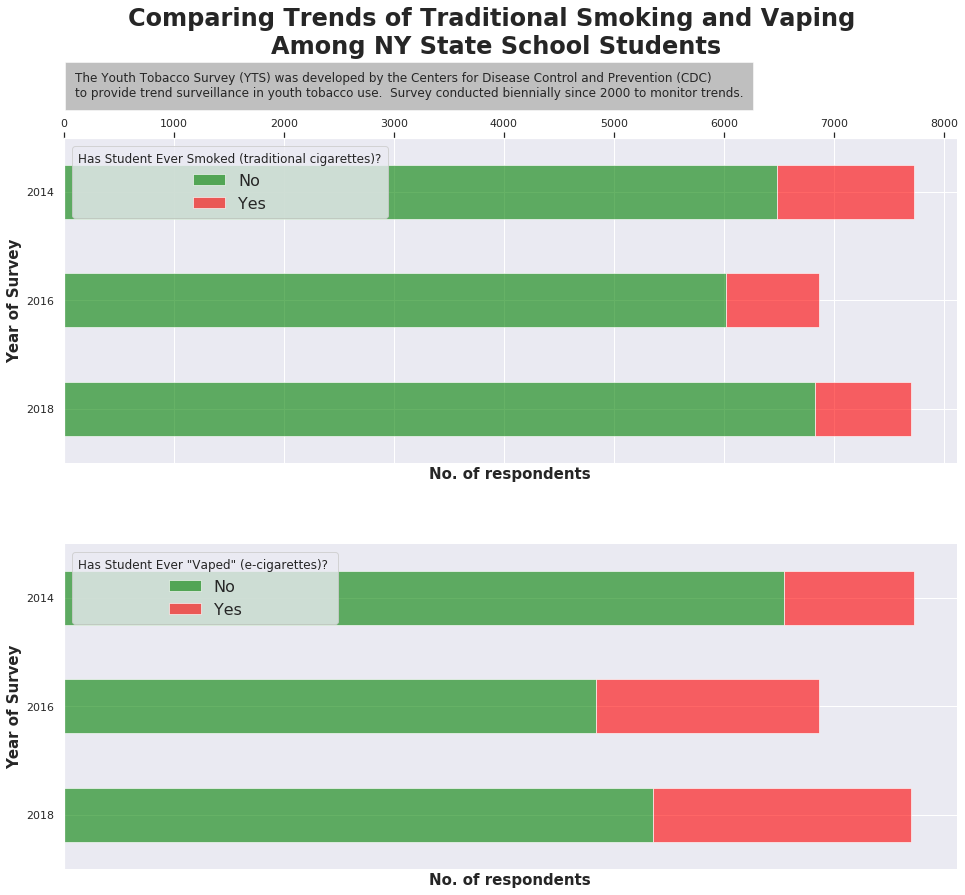

In [49]:
# output plots
fig = plt.figure(figsize=(16,14))
plt.subplots_adjust(hspace=0.25, top=0.85)

fig.suptitle('Comparing Trends of Traditional Smoking and Vaping \nAmong NY State School Students\n\n\n\n',\
             fontsize=24, fontweight='bold')
ax2 = fig.add_subplot(211) # smokers
ax1 = fig.add_subplot(212) # vapers

ax2.xaxis.tick_top() 
ax1.axes.get_xaxis().set_ticks([]) # hide the lower x-axis 

# set some shared params for the subplots
bar_colors = ['green', 'red']
alpha=0.6
plot_type='barh'

df.groupby(['year','ever_vaped']).size().unstack().plot(ax=ax1, kind=plot_type,stacked=True, alpha=alpha, color=bar_colors)
ax1.legend( loc='upper left', fontsize=16, title='Has Student Ever \"Vaped\" (e-cigarettes)? ')
ax1.set_xlabel('No. of respondents', fontsize=15, fontweight='bold')
ax1.set_ylabel('Year of Survey', fontsize=15, fontweight='bold')
ax1.invert_yaxis()
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

df.groupby(['year','eversmk']).size().unstack().plot(ax=ax2, kind=plot_type,stacked=True,alpha=alpha, color=bar_colors)
ax2.legend( loc='upper left', fontsize=16, title='Has Student Ever Smoked (traditional cigarettes)?')
ax2.set_xlabel('No. of respondents', fontsize=15, fontweight='bold')
ax2.set_ylabel('Year of Survey', fontsize=15, fontweight='bold')
ax2.invert_yaxis()
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
t = 'The Youth Tobacco Survey (YTS) was developed by the Centers for Disease Control and Prevention (CDC)\nto provide trend surveillance in youth tobacco use.  Survey conducted biennially since 2000 to monitor trends.'
plt.text(100, -4.65, t, wrap=True, bbox={'facecolor':'grey', 'alpha':0.5, 'pad':10})

plt.savefig('d2.png')


In [5]:
# explore data
group_by_y = df.groupby(by=['year'])
df_avg = group_by_y.mean()
print(df_avg)
group_by_y.count()

# normalise years as diff amounts in each -- percentage 

        _grade    _evape  stdnt_age    regsmk  ever_vape  ever_vape2
year                                                                
2014  8.722848  0.152880  14.236505  1.945890    1.84712    0.000000
2016  8.778199  0.295832  14.237540  1.971000    0.00000    1.704168
2018  8.867809  0.304246  14.332684  1.968835    0.00000    1.695754


,_grade,_evape,stdnt_age,eversmk,regsmk,ever_vape,ever_vape2,ever_vaped
year,,,,,,,,
2014,7725,7725,7725,7725,7725,7725,7725,7725
2016,6862,6862,6862,6862,6862,6862,6862,6862
2018,7701,7701,7701,7701,7701,7701,7701,7701


In [6]:
import seaborn as sns
sns.set()
#print(group_by_y.groups) # gives a dict
print( [*group_by_y.groups]) # py3.5+ syntax
group_by_y.get_group(2010).tail()

plt.scatter([*group_by_y.groups], group_by_y.count().iloc[:,0])
plt.show()
#plt.legend('ABCDEF', ncol=2, loc='upper left');

[2014, 2016, 2018]


KeyError: 2010